# Computer Vision Bootcamp: Assignment 3

## Reading

In [75]:
# Import the needed libraries
import cv2 as cv
import matplotlib.pyplot as plt

### General Purpose Functions

In [76]:
def show_image(img, title=None, isRGB=False):
    """
    Display an image with an optional title.

    Args:
    - img: The image to be displayed.
    - title: Optional title for the image.
    - isRGB: Optional flag for show RGB image.
    
    Returns:
    - None
    """
    if title is None:
        title = "Gray View" if len(img.shape) < 3 else "RGB View"

    if len(img.shape) >= 3:
        if not isRGB:
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.title(title)
    plt.imshow(img, cmap="gray" if len(img.shape) < 3 else None)
    plt.show()


def show_images_figure(images, titles):
    """
    Display multiple images in a single figure with corresponding titles.

    Args:
    - images: List of images to be displayed.
    - titles: List of titles for each image.

    Returns:
    - None
    """
    if len(images) != len(titles):
        raise ValueError("The number of images does not match the number of titles.")
    num_images = len(images)
    plt.figure(figsize=(num_images * 5, 5))
    for i, (image, title) in enumerate(zip(images, titles), start=1):
        plt.subplot(1, num_images, i)
        plt.title(title)
        plt.imshow(image, cmap="gray")
        # plt.axis('off')
    plt.show()

def convert_bgr2rgb(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

def convert_bgr2gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)


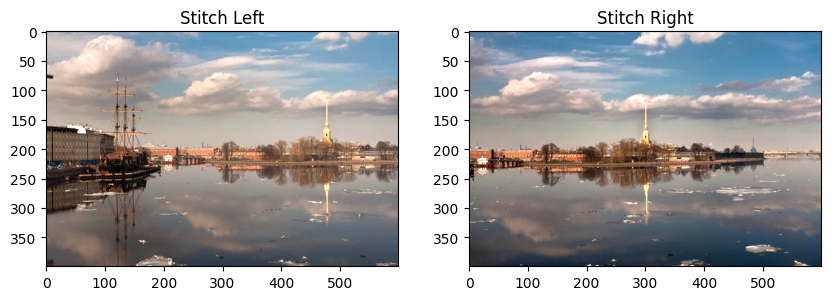

In [77]:
# read the images and show them in one figure in RGB


# ....:::: Reading the images ::::....

stitch_left = cv.imread("stitch_left.jpg")
stitch_right = cv.imread("stitch_right.jpg")


# ....:::: Convert to RGB ::::....

rgb_stitch_left = convert_bgr2rgb(stitch_left)
rgb_stitch_right = convert_bgr2rgb(stitch_right)


# ....:::: Display the images in one figure ::::....

images = [rgb_stitch_left, rgb_stitch_right]
titles = ["Stitch Left", "Stitch Right"]
show_images_figure(images, titles)

## Image Stitching

In [78]:
# define and use the stitcher

images = [rgb_stitch_left, rgb_stitch_right]

stitcher = cv.Stitcher_create()
status, result = stitcher.stitch(images)

# print the status of the operation

print("Stitching Status =", status, ", Done Successfully")

Stitching Status = 0 , Done Successfully


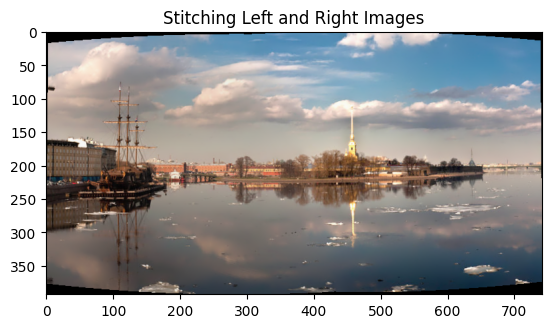

In [79]:
# Show the stitiched (result) image
if status == 0:
    show_image(result, title="Stitching Left and Right Images", isRGB=True)

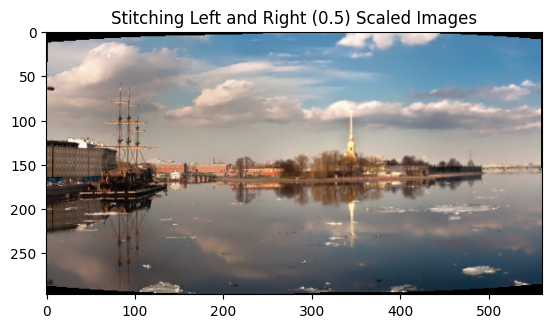

In [80]:
# use the scaling function, scale the right image by a factor of 0.5 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_50_right_image = cv.resize(rgb_stitch_right, None, fx=0.5, fy=0.5)

status, result50 = stitcher.stitch([rgb_stitch_left, scaled_50_right_image])
if status == 0:
    show_image(result50, title="Stitching Left and Right (0.5) Scaled Images", isRGB=True)

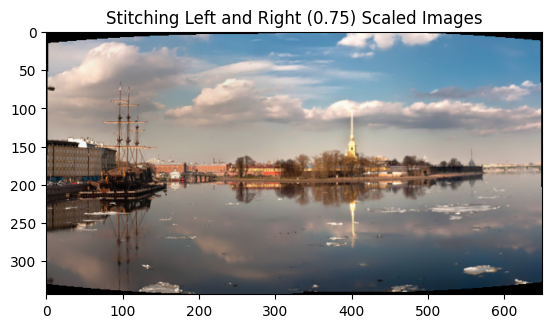

In [81]:
# use the scaling function, scale the right image by a factor of 0.75 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_75_right_image = cv.resize(rgb_stitch_right, None, fx=0.75, fy=0.75)

status, result75 = stitcher.stitch([rgb_stitch_left, scaled_75_right_image])
if status == 0:
    show_image(result75, title="Stitching Left and Right (0.75) Scaled Images", isRGB=True)

## Depth

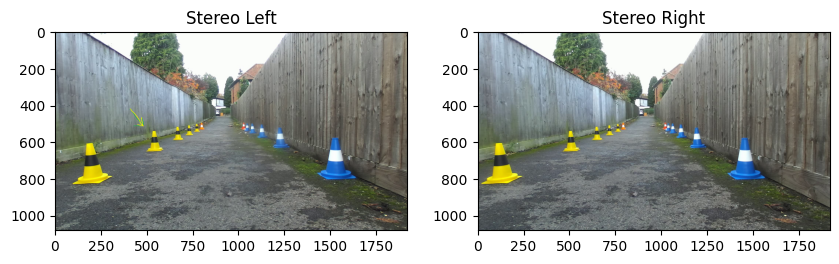

In [82]:
# Load the stereo images and show them in RGB

# ....:::: Reading the images ::::....

stereo_left = cv.imread("stereo_left.png")
stereo_right = cv.imread("stereo_right.png")

# ....:::: Convert to RGB ::::....

rgb_stereo_left = convert_bgr2rgb(stereo_left)
rgb_stereo_right = convert_bgr2rgb(stereo_right)

# ....:::: Display the images in one figure ::::....

images = [rgb_stereo_left, rgb_stereo_right]
titles = ["Stereo Left", "Stereo Right"]
show_images_figure(images, titles)

<ipython-input-83-84efe3e40b17>:14: RuntimeWarning: divide by zero encountered in divide
  depth = focal_length * baseline / disparity


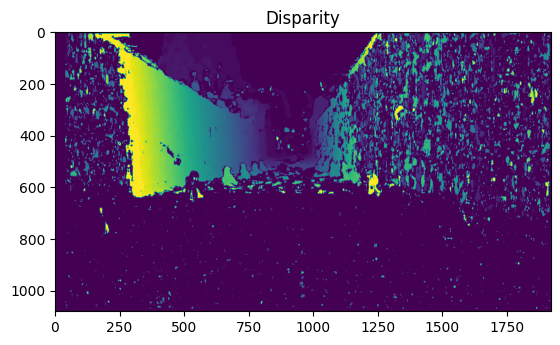

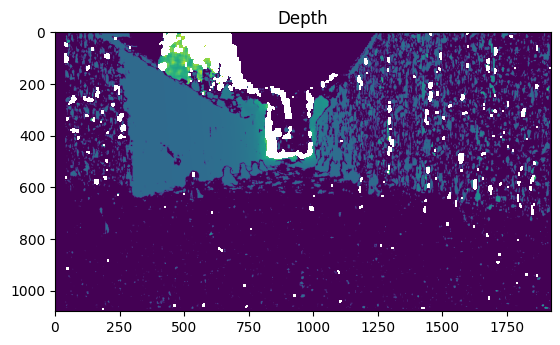

In [83]:
# convert both images to a suitable colour space
gray_ster_left = convert_bgr2gray(stereo_left)
gray_ster_right = convert_bgr2gray(stereo_right)

# Define and use the stereo function
stereo = cv.StereoBM_create(numDisparities=32, blockSize=19)
disparity = stereo.compute(gray_ster_left, gray_ster_right)
disparity[disparity == 0] = 0.1

# Using a focal length of 13000 and a baseline of 120mm, find the depth in meters
focal_length = 13000
baseline = 0.120

depth = focal_length * baseline / disparity

# show the depth map

plt.title("Disparity")
plt.imshow(disparity)
plt.show()

plt.title("Depth")
plt.imshow(depth)
plt.show()

What is the depth of the cone with the yellow arrow in the left image?

> *The depth of the second yellow cone is 3.8m approx.*




## Live Object detection

This task is done locally, download ultralytics locally and run a live detection using your laptop's camera a screenshot of how you detected an object in your room

Screenshot of running YOLO:


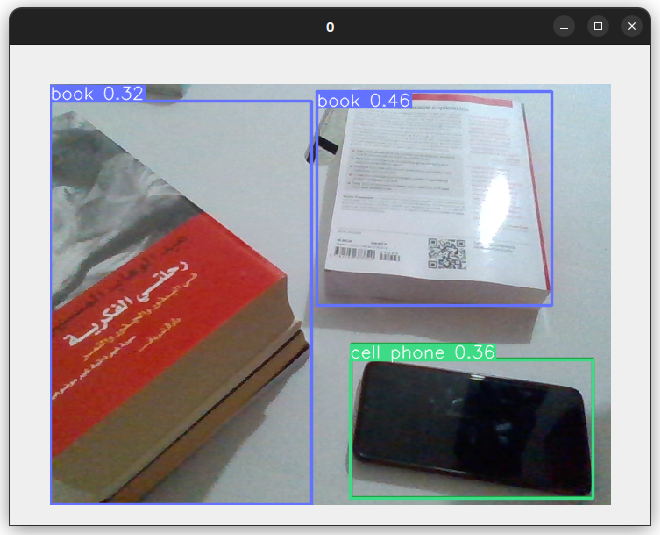